In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Siddharth Bingi\\Documents\\Sabir ML\\Assignment 1\\sgemm_product_dataset\\sgemm_product.csv")

In [3]:
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [4]:
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [58]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:, 0:14]
y = df["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [6]:
def costFunction(X,y,theta):
    squaredError = np.power(((X @ theta.T)-y),2)
    return np.sum(squaredError)/(2 * len(X))

In [ ]:
def testing_costFunction(X_test, y_test, theta):
    X_test = scaler.fit_transform(X_test)
    one_column = np.ones((X_test.shape[0],1))
    X_test = np.concatenate((one_column, X_test), axis = 1)
    

In [177]:
# gradient descent algorithm
def gradientDescent(X,y,theta,iterations,alpha, check_tol ,tolerance):
    cost_train = []
    cost_test = []
    for i in range(iterations):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost = costFunction(X, y, theta)
        cost_train.append(cost)
        
        cost = costFunction(X_test, y_test, theta)
        cost_test.append(cost)
        
        if check_tol:
            if (i>0) and(abs((cost_train[i]-cost_train[i-1])/cost_train[i-1]) < tolerance).any():
                print("Gradient Descent algorithm converged after", i+1, "Iterations")
                break
            
    
    return theta,cost_train, cost_test

In [164]:
def linear_regression(X, y, alpha, iterations,check_tol=False, tolerance=10**-4):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros((1,n+1))
    y = np.array(y).reshape((y.shape[0],1))
    theta, cost_train, cost_test = gradientDescent(X,y,theta,iterations,alpha, check_tol,tolerance)
    
    return theta,cost_train, cost_test

In [9]:
def test(X_test,theta):
    #scaler = StandardScaler()
    #X_test = scaler.fit_transform(X_test)

    #one_column = np.ones((X_test.shape[0],1))
    #X_test = np.concatenate((one_column, X_test), axis = 1)

    return X_test@theta.T

In [57]:
def rmse_function(X, y,theta, param):
    one_column = np.ones((X.shape[0],1))
    data_set = np.concatenate((one_column, X), axis = 1)
    
    y_prediction = []
    for i in range(len(param)):
        y_pred = test(data_set,theta[i])
        y_prediction.append(y_pred)
    
    rmse_val = []
    for i in range(len(param)):
        rmse = np.sqrt(metrics.mean_squared_error(y, y_prediction[i]))
        rmse_val.append(rmse)
    
    return rmse_val

In [10]:
alpha_values = [0.0001, 0.001, 0.01, 0.1]

alpha_train_theta = []
alpha_train_cost = []

alpha_test_cost = []


for i in range(len(alpha_values)):
    print("\n######---- Iteration with alpha value", alpha_values[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, alpha_values[i], 10000, False)
    
    alpha_train_theta.append(theta)
    alpha_train_cost.append(trainCost)
    
    alpha_test_cost.append(testCost)


######---- Iteration with alpha value 0.0001 -----#####

######---- Iteration with alpha value 0.001 -----#####

######---- Iteration with alpha value 0.01 -----#####

######---- Iteration with alpha value 0.1 -----#####


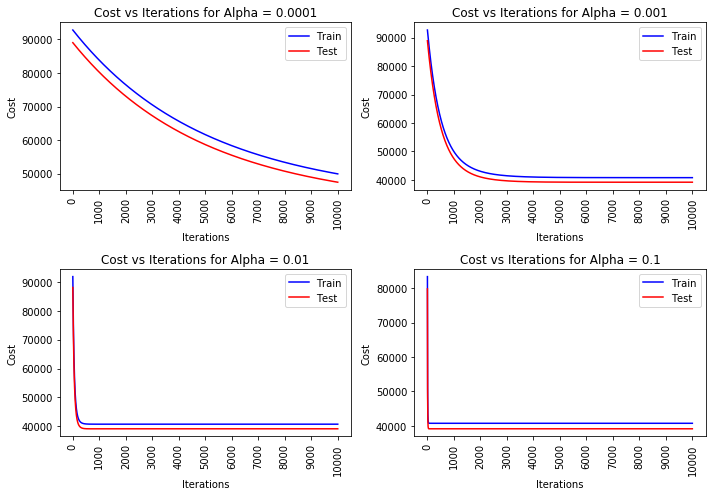

In [31]:
##### Plot for Cost vs Iterations for Each Alpha

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)

ax1.plot(range(len(alpha_train_cost[0])),alpha_train_cost[0],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[0])),alpha_test_cost[0],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.0001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

ax1 = fig.add_subplot(2,2,2)

ax1.plot(range(len(alpha_train_cost[1])),alpha_train_cost[1],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[1])),alpha_test_cost[1],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)


ax1 = fig.add_subplot(2,2,3)

ax1.plot(range(len(alpha_train_cost[2])),alpha_train_cost[2],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[2])),alpha_test_cost[2],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.01")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

ax1 = fig.add_subplot(2,2,4)

ax1.plot(range(len(alpha_train_cost[3])),alpha_train_cost[3],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[3])),alpha_test_cost[3],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.1")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

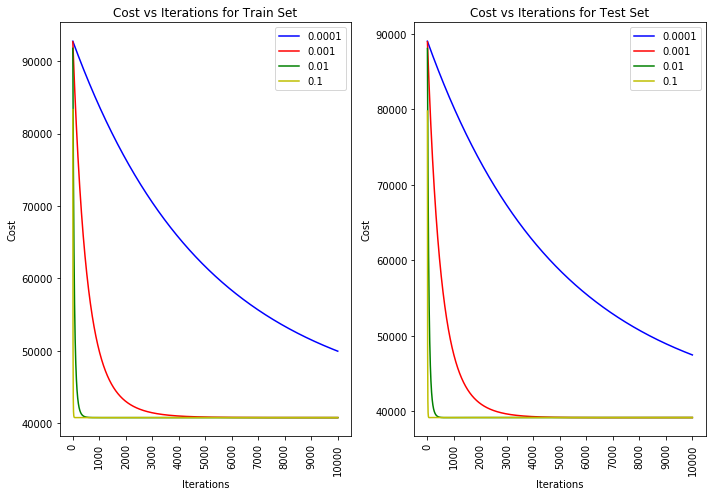

In [38]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,7))

ax2 = fig.add_subplot(1,2,1)

ax2.plot(range(len(alpha_train_cost[0])),alpha_train_cost[0],'-b', label="0.0001")
ax2.plot(range(len(alpha_train_cost[1])),alpha_train_cost[1],'-r', label="0.001")
ax2.plot(range(len(alpha_train_cost[2])),alpha_train_cost[2],'-g', label="0.01")
ax2.plot(range(len(alpha_train_cost[3])),alpha_train_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
ax2.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)


ax2 = fig.add_subplot(1,2,2)

ax2.plot(range(len(alpha_test_cost[0])),alpha_test_cost[0],'-b', label="0.0001")
ax2.plot(range(len(alpha_test_cost[1])),alpha_test_cost[1],'-r', label="0.001")
ax2.plot(range(len(alpha_test_cost[2])),alpha_test_cost[2],'-g', label="0.01")
ax2.plot(range(len(alpha_test_cost[3])),alpha_test_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
ax2.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

In [39]:
alpha_values

[0.0001, 0.001, 0.01, 0.1]

In [49]:
alpha_rmse_train = rmse_function(X_train, y_train, alpha_train_theta, alpha_values)
alpha_rmse_test = rmse_function(X_test, y_test, alpha_train_theta, alpha_values)

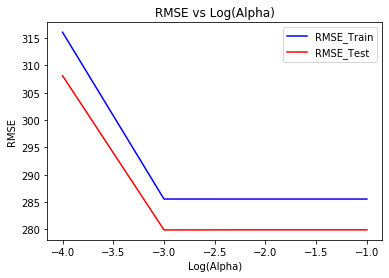

In [51]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(alpha_values),alpha_rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(alpha_values),alpha_rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Alpha)")
rmse_plot.set_title("RMSE vs Log(Alpha)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [111]:
alpha_train_theta[3].round(3)

array([[ 218.682,  142.344,  131.231,   40.899, -132.575, -129.636,
          10.052,   10.269,   12.971,   -3.711,   -5.501,   -5.109,
           0.437,   19.452,   23.819]])

# Question 2

In [53]:
print("The best alpha is 0.1")

The best alpha is 0.1


In [55]:
X_train.shape

(169120, 14)

In [112]:
alpha = 0.1
tol_val = [10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2]
tol_train_theta = []
tol_train_cost = []

tol_test_cost = []


for i in range(len(tol_val)):
    print("\n######---- Iteration with tolerance value", tol_val[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, alpha, 10000, True, tol_val[i])
    
    tol_train_theta.append(theta)
    tol_train_cost.append(trainCost)
    
    tol_test_cost.append(testCost)


######---- Iteration with tolerance value 1e-07 -----#####
Gradient Descent algorithm converged after 120 Iterations

######---- Iteration with tolerance value 1e-06 -----#####
Gradient Descent algorithm converged after 98 Iterations

######---- Iteration with tolerance value 1e-05 -----#####
Gradient Descent algorithm converged after 77 Iterations

######---- Iteration with tolerance value 0.0001 -----#####
Gradient Descent algorithm converged after 56 Iterations

######---- Iteration with tolerance value 0.001 -----#####
Gradient Descent algorithm converged after 35 Iterations

######---- Iteration with tolerance value 0.01 -----#####
Gradient Descent algorithm converged after 18 Iterations


In [113]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(tol_val)):
    y_pred = test(training_set,tol_train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
tol_rmse_train = []
for i in range(len(tol_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    tol_rmse_train.append(rmse)

In [114]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(tol_val)):
    y_pred = test(X_test,tol_train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
tol_rmse_test = []
for i in range(len(tol_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    tol_rmse_test.append(rmse)

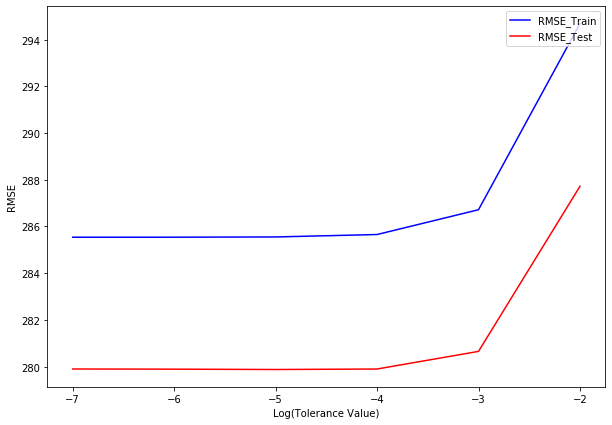

In [116]:
fig = plt.figure(figsize = (10,7))

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(tol_val),tol_rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(tol_val, ),tol_rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Tolerance Value)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

#Plot RMSE vs Iterations

In [117]:
print("The best tolerance value is 10^-4")

The best tolerance value is 10^-4


In [118]:
iters = list(range(10, 200, 20))
iter_train_theta = []
iter_train_cost = []

iter_test_cost = []


for i in range(len(iters)):
    print("\n######---- Iteration = ", iters[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(X_train, y_train, 0.1, iters[i], False, 10**-4)
    
    iter_train_theta.append(theta)
    iter_train_cost.append(trainCost)
    
    iter_test_cost.append(testCost)


######---- Iteration =  10 -----#####

######---- Iteration =  30 -----#####

######---- Iteration =  50 -----#####

######---- Iteration =  70 -----#####

######---- Iteration =  90 -----#####

######---- Iteration =  110 -----#####

######---- Iteration =  130 -----#####

######---- Iteration =  150 -----#####

######---- Iteration =  170 -----#####

######---- Iteration =  190 -----#####


In [119]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_prediction = []
for i in range(len(iters)):
    y_pred = test(training_set,iter_train_theta[i])
    y_prediction.append(y_pred)
    


iter_rmse_train = []
for i in range(len(iters)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    iter_rmse_train.append(rmse)

In [120]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(iters)):
    y_pred = test(X_test,iter_train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
iter_rmse_test = []
for i in range(len(iters)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    iter_rmse_test.append(rmse)

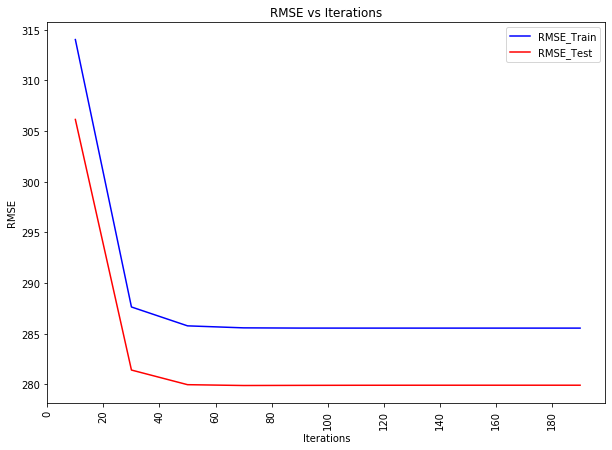

In [122]:
fig = plt.figure(figsize = (10,7))

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(iters,iter_rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(iters,iter_rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
rmse_plot.set_title("RMSE vs Iterations")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Iterations")
rmse_plot.set_xticks(list(range(0,200, 20)))
plt.xticks(rotation=90)
plt.show()

# Question 3

In [233]:
import random
k = random.sample(range(0, 14), 8)
print(k)
# defining feature matrix(X) and response vector(y) 
X = gpu.iloc[:,0:8]
y = gpu["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

[13, 6, 0, 8, 10, 5, 1, 3]


In [234]:
df.columns[k]

Index(['SB', 'NDIMB', 'MWG', 'VWM', 'STRM', 'MDIMA', 'NWG', 'MDIMC'], dtype='object')

In [163]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")

The best alpha is 0.1
The best tolerance value is 10^-4


In [204]:
alpha = 0.1
tolerance = 10**-4
theta_8, trainCost_8, testCost_8 = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

Gradient Descent algorithm converged after 48 Iterations


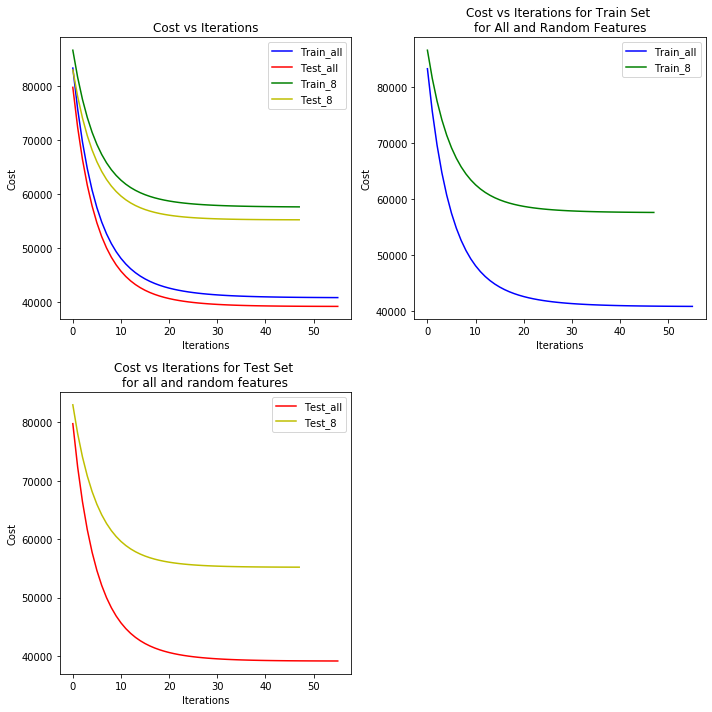

In [205]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(2,2,1)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")

ax2 = fig.add_subplot(2,2,2)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
#ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
#ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set \nfor All and Random Features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


ax2 = fig.add_subplot(2,2,3)

#ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
#ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set \nfor all and random features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


fig.tight_layout()
plt.show()

In [206]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred8 = test(training_set,theta_8)
rmse_train8 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred8))

In [209]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred8 = test(X_test,theta_8)
rmse_test8 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred8))

In [210]:
print(rmse_train8)
print(rmse_test8)
print(tol_rmse_train[3])
print(tol_rmse_test[3])

339.43777835154344
332.3165897886614
285.6560468516569
279.89802806727636


In [212]:
tol_train_theta[3]

[[ 2.18082665e+02  1.38610943e+02  1.27768306e+02  3.77211820e+01
  -1.27025348e+02 -1.24159833e+02  9.62539921e+00  9.71464458e+00
   1.29287309e+01  1.31266948e-01 -1.91844321e+00 -5.12215345e+00
   4.44916036e-01  1.94431361e+01  2.37771596e+01]]


# Question 4

In [235]:
best_features = [0,1,2,3,4,7,12,13]
df.columns[best_features]

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'KWI', 'SA', 'SB'], dtype='object')

In [217]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:,best_features]
y = df["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [218]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")

The best alpha is 0.1
The best tolerance value is 10^-4


In [220]:
alpha = 0.1
tolerance = 10**-4
theta_best, trainCost_best, testCost_best = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

Gradient Descent algorithm converged after 48 Iterations


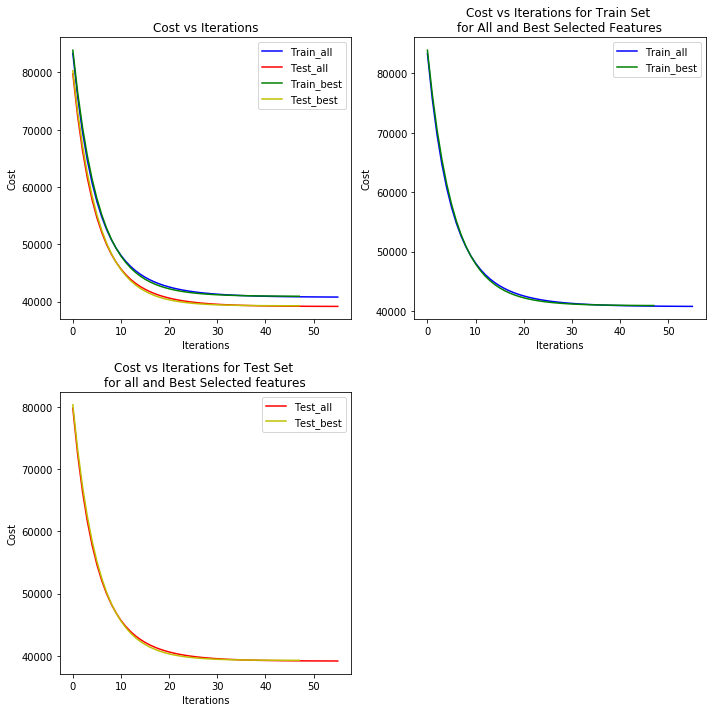

In [223]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,10))

ax2 = fig.add_subplot(2,2,1)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_best)),trainCost_best,'-g', label="Train_best")
ax2.plot(range(len(testCost_best)),testCost_best,'-y', label="Test_best")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")

ax2 = fig.add_subplot(2,2,2)

ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
#ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
ax2.plot(range(len(trainCost_best)),trainCost_best,'-g', label="Train_best")
#ax2.plot(range(len(testCost_8)),testCost_8,'-y', label="Test_8")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set \nfor All and Best Selected Features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


ax2 = fig.add_subplot(2,2,3)

#ax2.plot(range(len(tol_train_cost[3])),tol_train_cost[3],'-b', label="Train_all")
ax2.plot(range(len(tol_test_cost[3])),tol_test_cost[3],'-r', label="Test_all")
#ax2.plot(range(len(trainCost_8)),trainCost_8,'-g', label="Train_8")
ax2.plot(range(len(testCost_best)),testCost_best,'-y', label="Test_best")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set \nfor all and Best Selected features")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")


fig.tight_layout()
plt.show()

In [228]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred_best = test(training_set,theta_best)
rmse_train_best = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_best))

In [229]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred_best = test(X_test,theta_8)
rmse_test_best = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_best))

In [230]:
print(rmse_test_best)
print(rmse_train_best)

280.28012020177977
286.15684947519884


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_001))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_001))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_001)))
print('R-squared:', metrics.r2_score(y_test, y_pred_001))  


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))  

# Linear Regression using sklearn

In [ ]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:, 0:14]
y = df["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# create linear regression object 
reg = LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
print('Intercept: \n', reg.intercept_)
  

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))